In [15]:
import numpy as np

#loading the save numpy arrays in the previous code
data=np.load('data.npy')
target=np.load('target.npy')

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [18]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 50s 2s/step - loss: 0.7788 - accuracy: 0.4929 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 2/20
31/31 [==============================] - 35s 1s/step - loss: 0.6352 - accuracy: 0.6535 - val_loss: 0.5128 - val_accuracy: 0.7258
Epoch 3/20
31/31 [==============================] - 34s 1s/step - loss: 0.5077 - accuracy: 0.7535 - val_loss: 0.3794 - val_accuracy: 0.8427
Epoch 4/20
31/31 [==============================] - 34s 1s/step - loss: 0.3320 - accuracy: 0.8636 - val_loss: 0.2804 - val_accuracy: 0.8911
Epoch 5/20
31/31 [==============================] - 35s 1s/step - loss: 0.2609 - accuracy: 0.9101 - val_loss: 0.2488 - val_accuracy: 0.8952
Epoch 6/20
31/31 [==============================] - 35s 1s/step - loss: 0.2178 - accuracy: 0.9242 - val_loss: 0.2051 - val_accuracy: 0.9113
Epoch 7/20
31/31 [==============================] - 35s 1s/step - loss: 0.1661 - accuracy: 0.9424 - val_loss: 0.1876 - val_accuracy: 0.9234
Epoch 8/20
31/31 [==

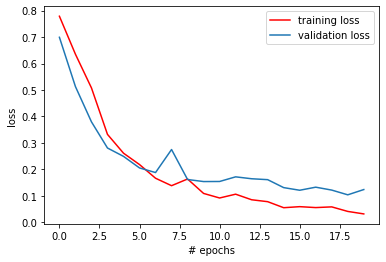

In [19]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

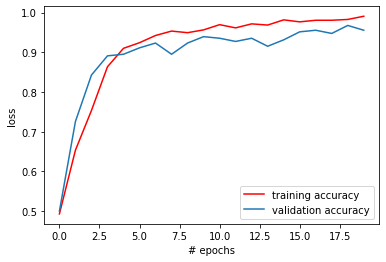

In [20]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 192ms/step - loss: 0.0755 - accuracy: 0.9710
[0.07549435645341873, 0.9710144996643066]
